In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from keras.preprocessing.sequence import pad_sequences


import seaborn as sns
import string
from nltk.corpus import stopwords

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

2022-04-17 23:46:19.530540: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-17 23:46:19.530591: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:

data=pd.read_csv('../input/1429_1.csv')
data.head()


review=pd.DataFrame(data.groupby('reviews.rating').size().sort_values(ascending=False).rename('No of Users').reset_index())
review.head()

permanent = data[['reviews.rating' , 'reviews.text' , 'reviews.title' , 'reviews.username']]
mpermanent=permanent.dropna()
mpermanent.head()

check =  mpermanent[mpermanent["reviews.text"].isnull()]
check.head()

actualrating = mpermanent[(mpermanent['reviews.rating'] == 1) | (mpermanent['reviews.rating'] == 5)]
actualrating.shape


/tmp/ipykernel_12453/347789765.py:1: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('../input/1429_1.csv')


(24178, 4)

In [4]:
y = actualrating['reviews.rating']
x = actualrating['reviews.text'].reset_index()

len(y)

X = x['reviews.text']
print(X)

print(len(X))


0        This product so far has not disappointed. My c...
1        great for beginner or experienced person. Boug...
2        Inexpensive tablet for him to use and learn on...
3        I bought this for my grand daughter when she c...
4        This amazon fire 8 inch tablet is the perfect ...
                               ...                        
24173    This is exactly like any other usb power charg...
24174    Amazon should include this charger with the Ki...
24175    Love my Kindle Fire but I am really disappoint...
24176    I was surprised to find it did not come with a...
24177    to spite the fact that i have nothing but good...
Name: reviews.text, Length: 24178, dtype: object
24178


In [5]:

import string
from nltk.corpus import stopwords
def text_process(text):
    '''
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Return the cleaned text as a list of words
    '''
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

tokens = X[0].split()
print(tokens)

sample_text = "Hey there! This is a sample review, which happens to contain punctuations."
print(text_process(sample_text))


['This', 'product', 'so', 'far', 'has', 'not', 'disappointed.', 'My', 'children', 'love', 'to', 'use', 'it', 'and', 'I', 'like', 'the', 'ability', 'to', 'monitor', 'control', 'what', 'content', 'they', 'see', 'with', 'ease.']
['Hey', 'sample', 'review', 'happens', 'contain', 'punctuations']


In [6]:

from sklearn.feature_extraction.text import CountVectorizer
# next we need to vectorize our input variable (X)
#we use the count vectoriser function and the analyser we use is the above lines of code
# this should return a vector array
bow_transformer = CountVectorizer(analyzer=text_process).fit(X)

# %%
len(bow_transformer.vocabulary_)

# %%
review_24 = X[24]


In [7]:

# %%
bow_25 = bow_transformer.transform([review_24])
bow_25

# %%
print(bow_25)

# %%
X = bow_transformer.transform(X)

  (0, 1816)	1
  (0, 2476)	1
  (0, 5664)	1
  (0, 7835)	1
  (0, 10671)	1
  (0, 10778)	1
  (0, 11499)	1
  (0, 11691)	1
  (0, 11940)	1
  (0, 14868)	1
  (0, 15195)	1
  (0, 15507)	1
  (0, 16158)	1
  (0, 16540)	1


In [49]:
# %%
#Lets start training the model
from sklearn.model_selection import train_test_split
#using 30% of the data for testing, this will be revised once we do not get the desired accuracy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


from sklearn.svm import SVC
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
accuracy_arr = []
for i in kernels:
  clf = SVC(kernel=i)
  clf.fit(X_train, y_train) 
  accuracy_arr.append(clf.score(X_test,y_test))

[0.9858009374138407, 0.9831816928591122, 0.9838709677419355, 0.982492417976289]


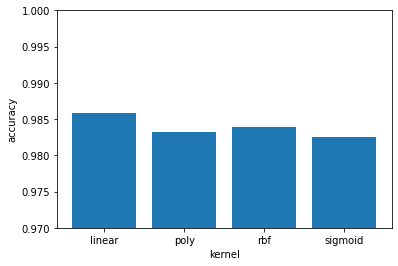

In [50]:
import matplotlib.pyplot as plt
plt.bar(kernels, accuracy_arr)
plt.ylim(0.97,1.0)
plt.xlabel('kernel')
plt.ylabel('accuracy')
print(accuracy_arr)
plt.show()